In [1]:
import numpy as np
from spin_chain import spin_chain_1d, chain_energy_py, average_energy_py, average_magnetization_py, average_heat_capacity_py
from spin_chain import simulate_2d_py, lattice_energy_py, average_energy_2d_py, average_magnetization_2d_py, average_heat_capacity_2d_py
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go

# Одномерная цепочка

In [2]:
def plot_spin_evolution(spins):
    N_iter, N_spins = spins.shape
    
    plt.figure(figsize=(10, 6))
    
    k_values, i_values = np.where(spins == 1)
    plt.scatter(k_values, i_values, color='royalblue', s=3, marker='o')
    
    plt.xlabel("Номер состояния", fontsize=15)
    plt.ylabel("Позиция частицы", fontsize=15)
    
    plt.xlim(0, N_iter - 1)
    plt.ylim(0, N_spins - 1)
    
    plt.tight_layout()
    plt.show()

def plot_spin_energy(spins, temp, spin_j, b_field, bohr_magneton, 
                    window_size=50):

    iteration, spin_length = spins.shape
    
    energies = np.array([chain_energy_py(spins[i], spin_length, temp, 
                                       spin_j, b_field, bohr_magneton) 
                        for i in range(iteration)])
    
    energies_per_spin = energies / spin_length
    if iteration > window_size:
        moving_avg = np.convolve(energies_per_spin, 
                                np.ones(window_size)/window_size, 
                                mode='valid')
    
    plt.figure(figsize=(12, 6))
    
    plt.plot(energies_per_spin, color='royalblue', alpha=0.3, 
            label='Мгновенная энергия')
    
    if iteration > window_size:
        plt.plot(np.arange(window_size-1, iteration), moving_avg, 
                color='crimson', linewidth=2,
                label=f'Скользящее среднее')
    
    plt.xlabel('Номер итерации', fontsize=14)
    plt.ylabel('Энергия на один спин', fontsize=14)

    plt.title(f'Эволюция энергии спиновой цепочки\nT={temp:.2f}, J={spin_j:.2f}, B={b_field:.2f}', 
                 fontsize=16)
    
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

In [3]:
# all_initial_conditions: 0 == 'heat', 1 == 'cold'
initial_conditions = 0
spin_length = 100
temp = 1
spin_j = -1
b_field = 0
bohr_magneton = 1
iteration = 1000


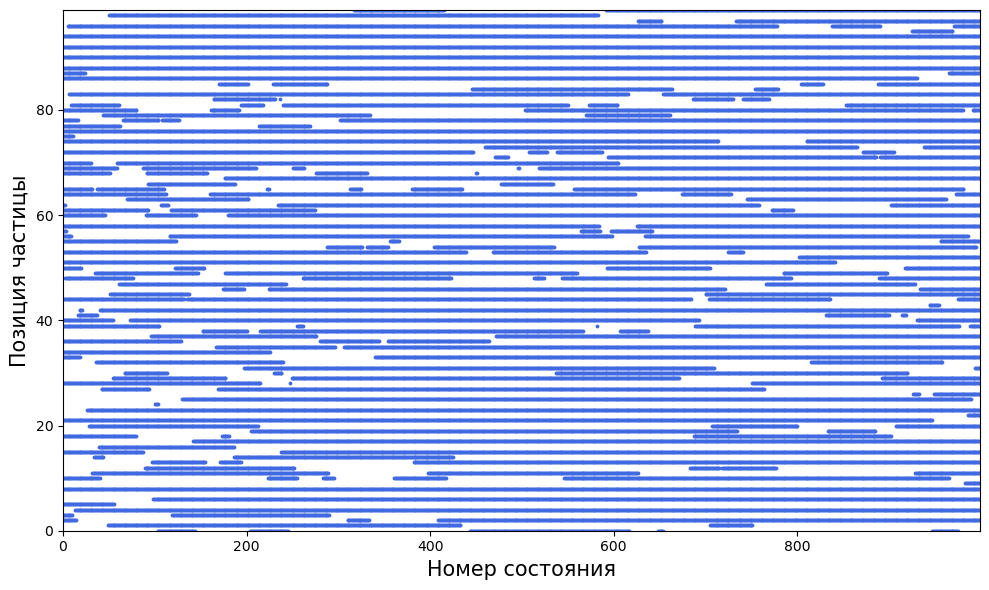

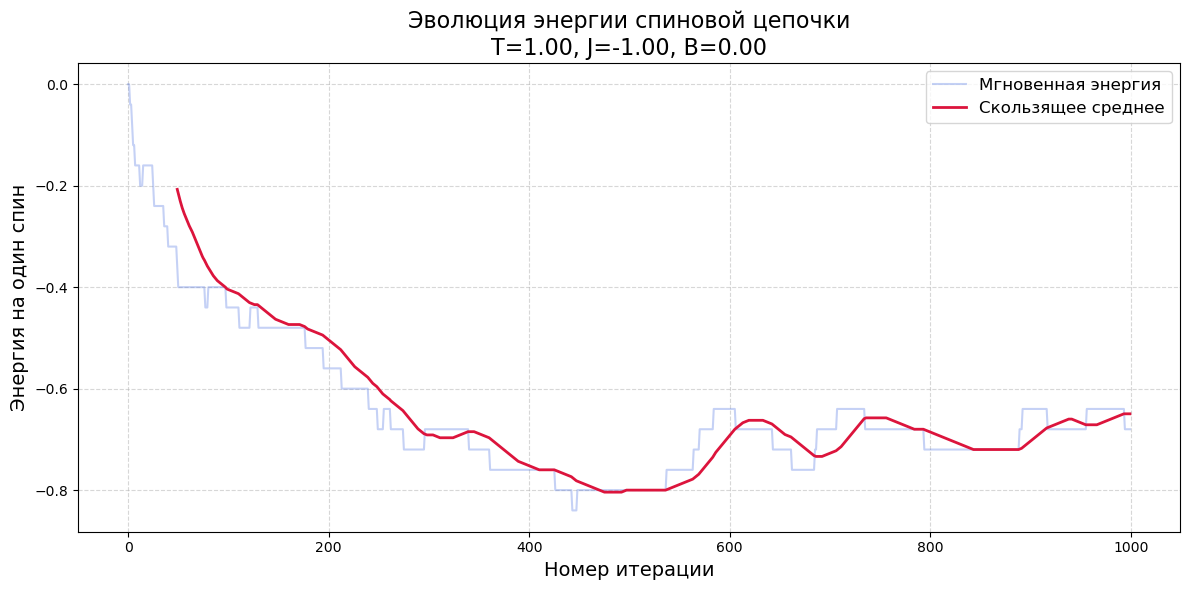

In [ ]:
spins = spin_chain_1d(initial_conditions, spin_length, temp, spin_j, b_field, bohr_magneton, iteration)
# plot_spin_evolution(spins)
# plot_spin_energy(spins, temp, spin_j, b_field, bohr_magneton)

# Термодинамические величины

In [24]:
def u_analit(temp, spin_length, spin_j): 
    return -spin_length * spin_j * np.tanh(spin_j / temp) / spin_length

def c_p_analit(temp, spin_length, spin_j):
    x = spin_j / temp
    return spin_length * x**2 / (np.cosh(x)**2 * spin_length)

def magnetization_analit(temp, spin_length, spin_j, b_field):
    if b_field == 0:
        return 0.0
    x = spin_j / temp
    h = b_field / temp
    return spin_length * np.sinh(h) / np.sqrt(np.sinh(h)**2 + np.exp(-4*x)) / spin_length

def plot_thermodynamic_quantities(temps, values, name, spin_length, spin_j, b_field=0, window_size=3):
    thermodynamic_quantities = ['Энергия', 'Намагниченность', 'C_p']
    
    if name == thermodynamic_quantities[0]:
        values_analit = np.array([u_analit(t, spin_length, spin_j) for t in temps])  # Убрано spin_length
        ylabel = "Энергия на спин"
    elif name == thermodynamic_quantities[1]:
        values_analit = np.array([magnetization_analit(t, spin_length, spin_j, b_field) for t in temps])  # Убрано spin_length
        ylabel = "Намагниченность"
    elif name == thermodynamic_quantities[2]:
        values_analit = np.array([c_p_analit(t, spin_length, spin_j) for t in temps]) 
        ylabel = "Теплоемкость (C_p)"
    else:
        raise ValueError(f"Неизвестная величина: {name}. Допустимы: {thermodynamic_quantities}")

    if len(values) > window_size:
        moving_avg = np.convolve(values, np.ones(window_size)/window_size, mode='valid')
        moving_avg_temps = temps[window_size//2 : window_size//2 + len(moving_avg)]
    else:
        moving_avg = None

    plt.figure(figsize=(12, 6))
    
    plt.plot(temps, values, 'o', color='royalblue', markersize=4, alpha=0.5, label='Численное решение')
    
    if moving_avg is not None:
        plt.plot(moving_avg_temps, moving_avg, '-', color='darkblue', linewidth=2, 
                label=f'Скользящее среднее (окно={window_size})')
    
    plt.plot(temps, values_analit, '--', color='red', linewidth=2, label='Аналитическое решение')
    
    plt.xlabel("Температура", fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    
    title = f"{name} цепочки Изинга\nN={spin_length}, J={spin_j:.1f}"
    if b_field != 0 and name == 'Намагниченность':
        title += f", B={b_field:.1f}"
    plt.title(title, fontsize=16)
    
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=12, loc='best')
    plt.tight_layout()
    plt.show()

In [25]:
# разогрев spin_length*15

initial_conditions = 0
spin_length = 1500
spin_j = 1
b_field = 0.1
bohr_magneton = 1
iteration = spin_length * 24

t_min = 0.2
t_max = 5
dt = 0.04
temp_number = (t_max - t_min) / dt



In [26]:
temp_list = np.linspace(t_min, t_max, int(temp_number))
energy_list = average_energy_py(iteration, initial_conditions, t_min, t_max, dt, spin_j, b_field, spin_length, bohr_magneton)
magnetization_list =  average_magnetization_py(iteration, initial_conditions, t_min, t_max, dt, spin_j, b_field, spin_length, bohr_magneton)
c_p_list =  average_heat_capacity_py(iteration, initial_conditions, t_min, t_max, dt, spin_j, b_field, spin_length, bohr_magneton)

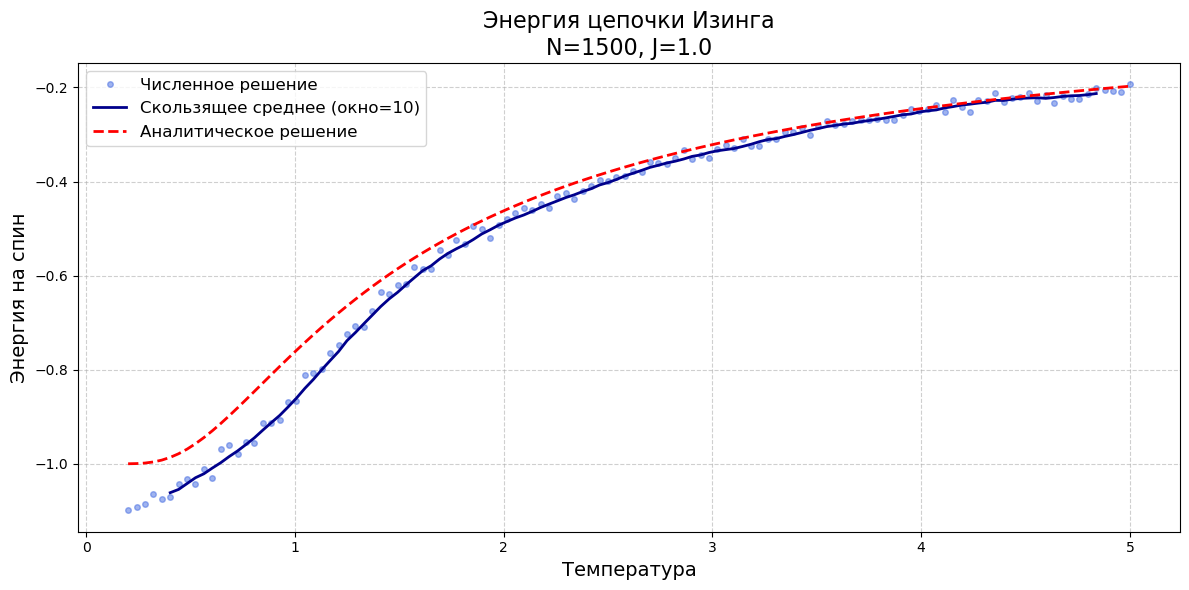

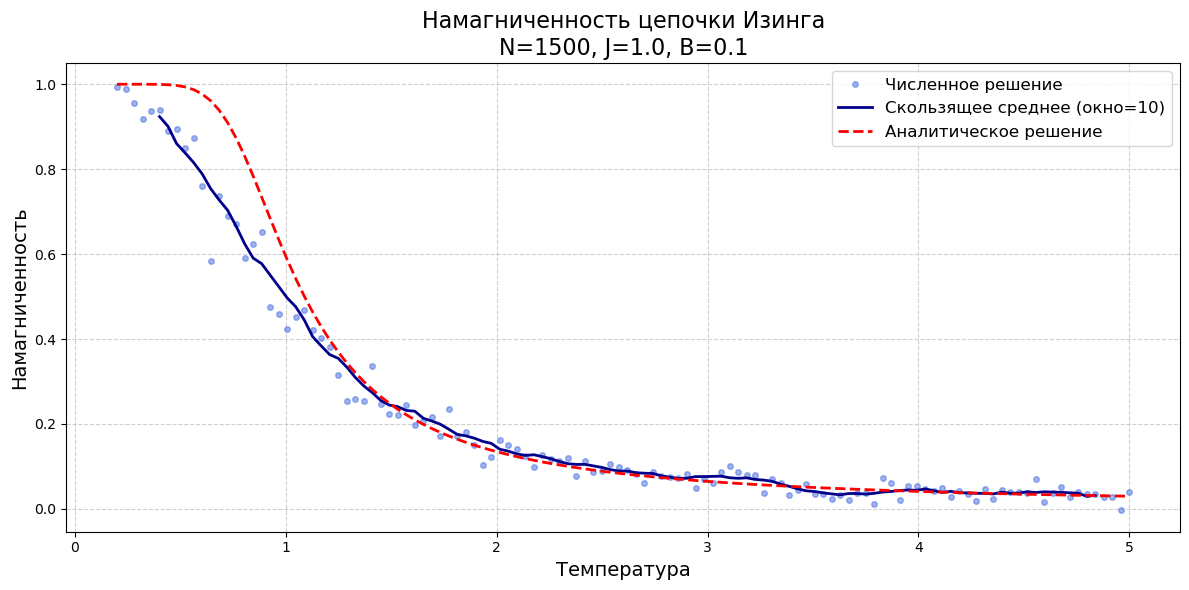

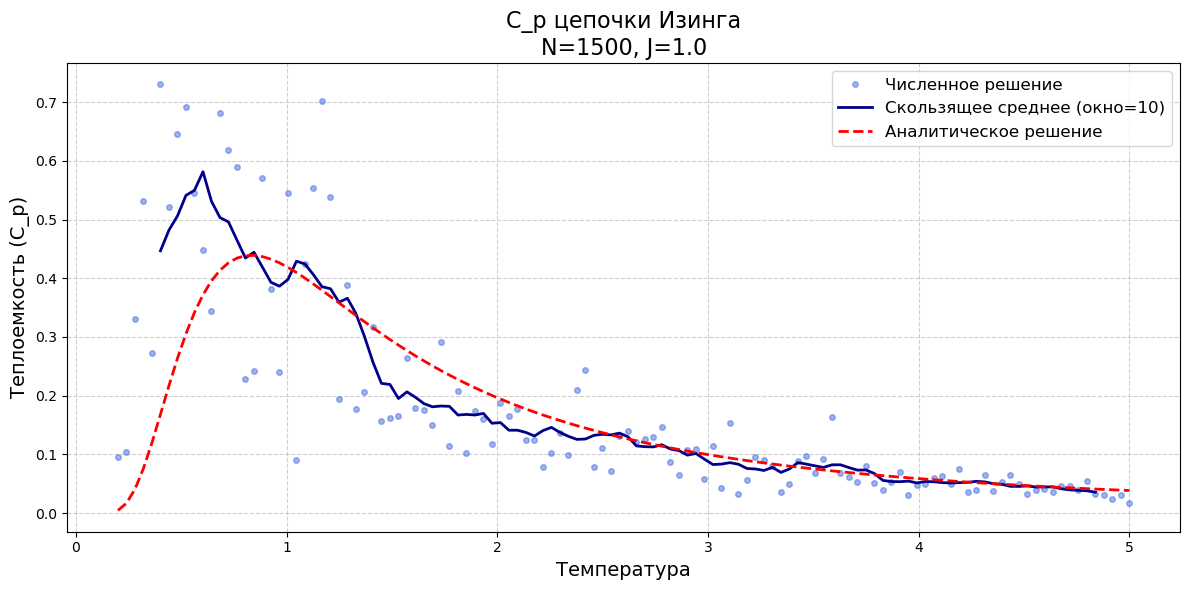

In [ ]:
thermodynamic_quantities = ['Энергия','Намагниченность', 'C_p']

window_size = 10
# plot_thermodynamic_quantities(temp_list, energy_list, thermodynamic_quantities[0], spin_length, spin_j, b_field, window_size)
# plot_thermodynamic_quantities(temp_list, magnetization_list, thermodynamic_quantities[1], spin_length, spin_j, b_field, window_size)
# plot_thermodynamic_quantities(temp_list, c_p_list, thermodynamic_quantities[2], spin_length, spin_j, b_field, window_size)


# Двумерная цепочка

In [38]:
def plot_spin_evolution_2d(spins_history):
    iterations, L, _ = spins_history.shape
    
    plt.figure(figsize=(12, 8))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    im1 = ax1.imshow(spins_history[0], cmap=ListedColormap(['white', 'royalblue']), 
                    vmin=-1, vmax=1, interpolation='none')
    ax1.set_title(f"Начальное состояние", fontsize=12)
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    im2 = ax2.imshow(spins_history[-1], cmap=ListedColormap(['white', 'royalblue']), 
                    vmin=-1, vmax=1, interpolation='none')
    ax2.set_title(f"Конечное состояние после {iterations} итераций", fontsize=12)
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    plt.colorbar(im1, ax=ax1)
    plt.colorbar(im2, ax=ax2)
    plt.tight_layout()
    plt.show()

def plot_spin_energy_2d(spins_history, temp, spin_j, b_field, bohr_magneton, 
                       window_size=50):
    iterations, L, _ = spins_history.shape
    
    energies = np.array([lattice_energy_py(spins_history[i], L, temp, 
                        spin_j, b_field, bohr_magneton) 
                       for i in range(iterations)])
    
    energies_per_spin = energies / (L * L)
    
    if iterations > window_size:
        moving_avg = np.convolve(energies_per_spin, 
                                np.ones(window_size)/window_size, 
                                mode='valid')
    
    plt.figure(figsize=(12, 6))
    
    plt.plot(energies_per_spin, color='royalblue', alpha=0.3, 
            label='Мгновенная энергия')
    
    if iterations > window_size:
        plt.plot(np.arange(window_size-1, iterations), moving_avg, 
                color='crimson', linewidth=2,
                label=f'Скользящее среднее (окно {window_size})')
    
    plt.xlabel('Номер итерации', fontsize=14)
    plt.ylabel('Энергия на один спин', fontsize=14)
    plt.title(f'Эволюция энергии 2D решетки {L}×{L}', 
             fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

    

In [39]:
initial_condition = 0
lattice_size = 20 
temp = 2.5
spin_j = 1.0
b_field = 0.1
bohr_magneton = 1.0
iteration = 1000

<Figure size 1200x800 with 0 Axes>

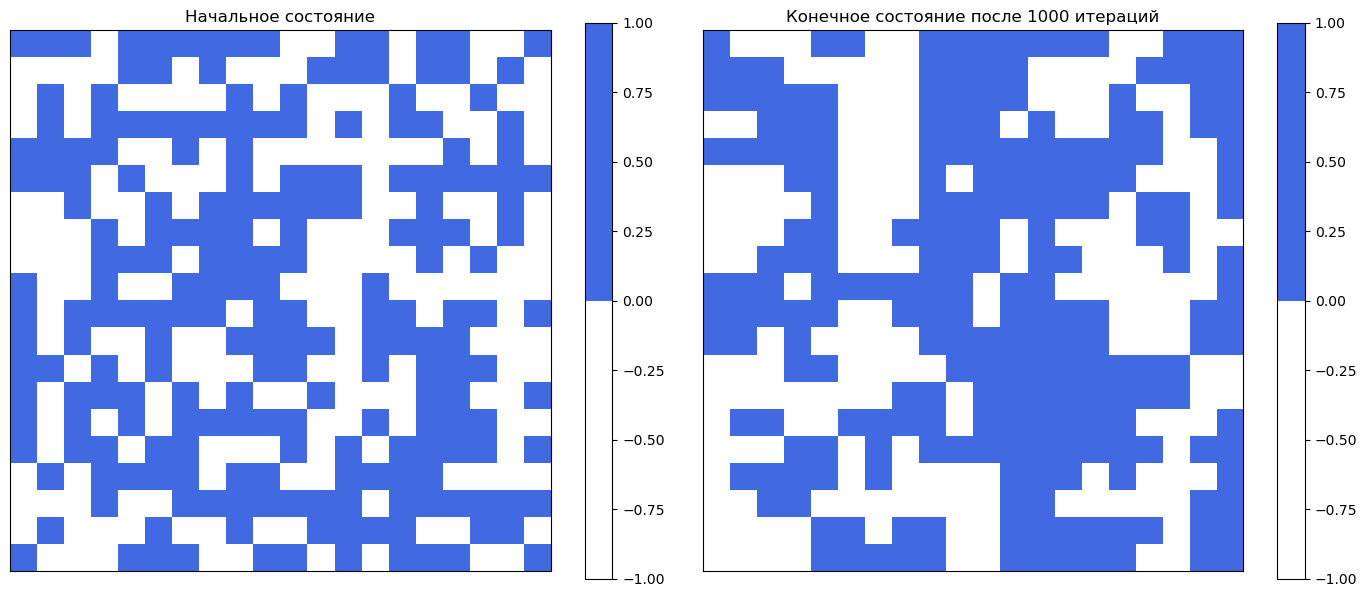

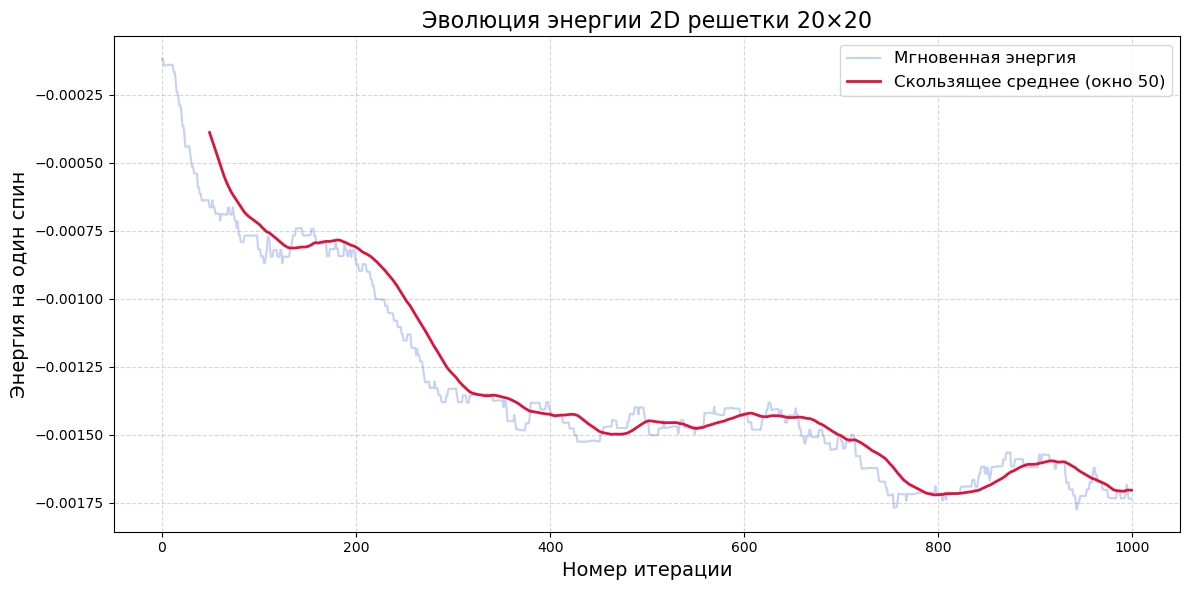

In [ ]:
spins_history = simulate_2d_py(
    initial_condition,
    lattice_size,
    temp,
    spin_j,
    b_field,
    bohr_magneton,
    iteration
)

# plot_spin_evolution_2d(spins_history)
# plot_spin_energy_2d(spins_history, temp=2.5, spin_j=1.0, 
#                    b_field=0.1, bohr_magneton=1.0)


# Термодинамические величины

In [46]:
def plot_all_thermodynamic_2d(temps, energies, magnetizations, heat_capacities, 
                            lattice_size, spin_j, b_field=0.0, window_size=5):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 16), sharex=True)
    
    tc = 2.269 * spin_j  # Критическая температура
    
    ax1.plot(temps, energies, 'o', color='royalblue', markersize=4, alpha=0.4)
    if len(energies) > window_size:
        smoothed = np.convolve(energies, np.ones(window_size)/window_size, mode='valid')
        ax1.plot(temps[window_size//2:-window_size//2+1], smoothed, '-', color='navy', label=f'Сглаживание (окно {window_size})')
    ax1.set_ylabel("Энергия на спин", fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.5)
    ax1.legend()
    
    ax2.plot(temps, magnetizations, 'o', color='forestgreen', markersize=4, alpha=0.4)
    if len(magnetizations) > window_size:
        smoothed = np.convolve(magnetizations, np.ones(window_size)/window_size, mode='valid')
        ax2.plot(temps[window_size//2:-window_size//2+1], smoothed, '-', color='darkgreen')
    ax2.set_ylabel("Намагниченность", fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.5)
    
    ax3.plot(temps, heat_capacities, 'o', color='darkorange', markersize=4, alpha=0.4)
    if len(heat_capacities) > window_size:
        smoothed = np.convolve(heat_capacities, np.ones(window_size)/window_size, mode='valid')
        ax3.plot(temps[window_size//2:-window_size//2+1], smoothed, '-', color='sienna')
    ax3.set_ylabel("Теплоемкость (C_p)", fontsize=12)
    ax3.set_xlabel("Температура", fontsize=12)
    ax3.grid(True, linestyle='--', alpha=0.5)
    
    for ax in [ax1, ax2, ax3]:
        ax.axvline(x=tc, color='red', linestyle=':', linewidth=1.5, alpha=0.5)
    
    title = f"Термодинамические величины 2D решетки {lattice_size}×{lattice_size}\n"
    title += f"J={spin_j:.2f}"
    if b_field != 0:
        title += f", B={b_field:.2f}"
    plt.suptitle(title, fontsize=16, y=0.92)
    
    plt.tight_layout()
    plt.show()

In [62]:
initial_conditions = 0
spin_length = 1500
spin_j = 1
b_field = 0.1
bohr_magneton = 1
iteration = spin_length * 24

t_min = 0.2
t_max = 5
dt = 0.04
temp_number = (t_max - t_min) / dt

In [68]:
temp_list = np.linspace(t_min, t_max, int(temp_number) + 1)
energies = average_energy_2d_py(iteration, initial_condition, 
                        t_min, t_max, dt,
                        spin_j, b_field, lattice_size,
                        bohr_magneton)
magnetizations = average_magnetization_2d_py(iteration, initial_condition, 
                        t_min, t_max, dt,
                        spin_j, b_field, lattice_size,
                        bohr_magneton)
heat_caps = average_heat_capacity_2d_py(iteration, initial_condition, 
                        t_min, t_max, dt,
                        spin_j, b_field, lattice_size,
                        bohr_magneton)


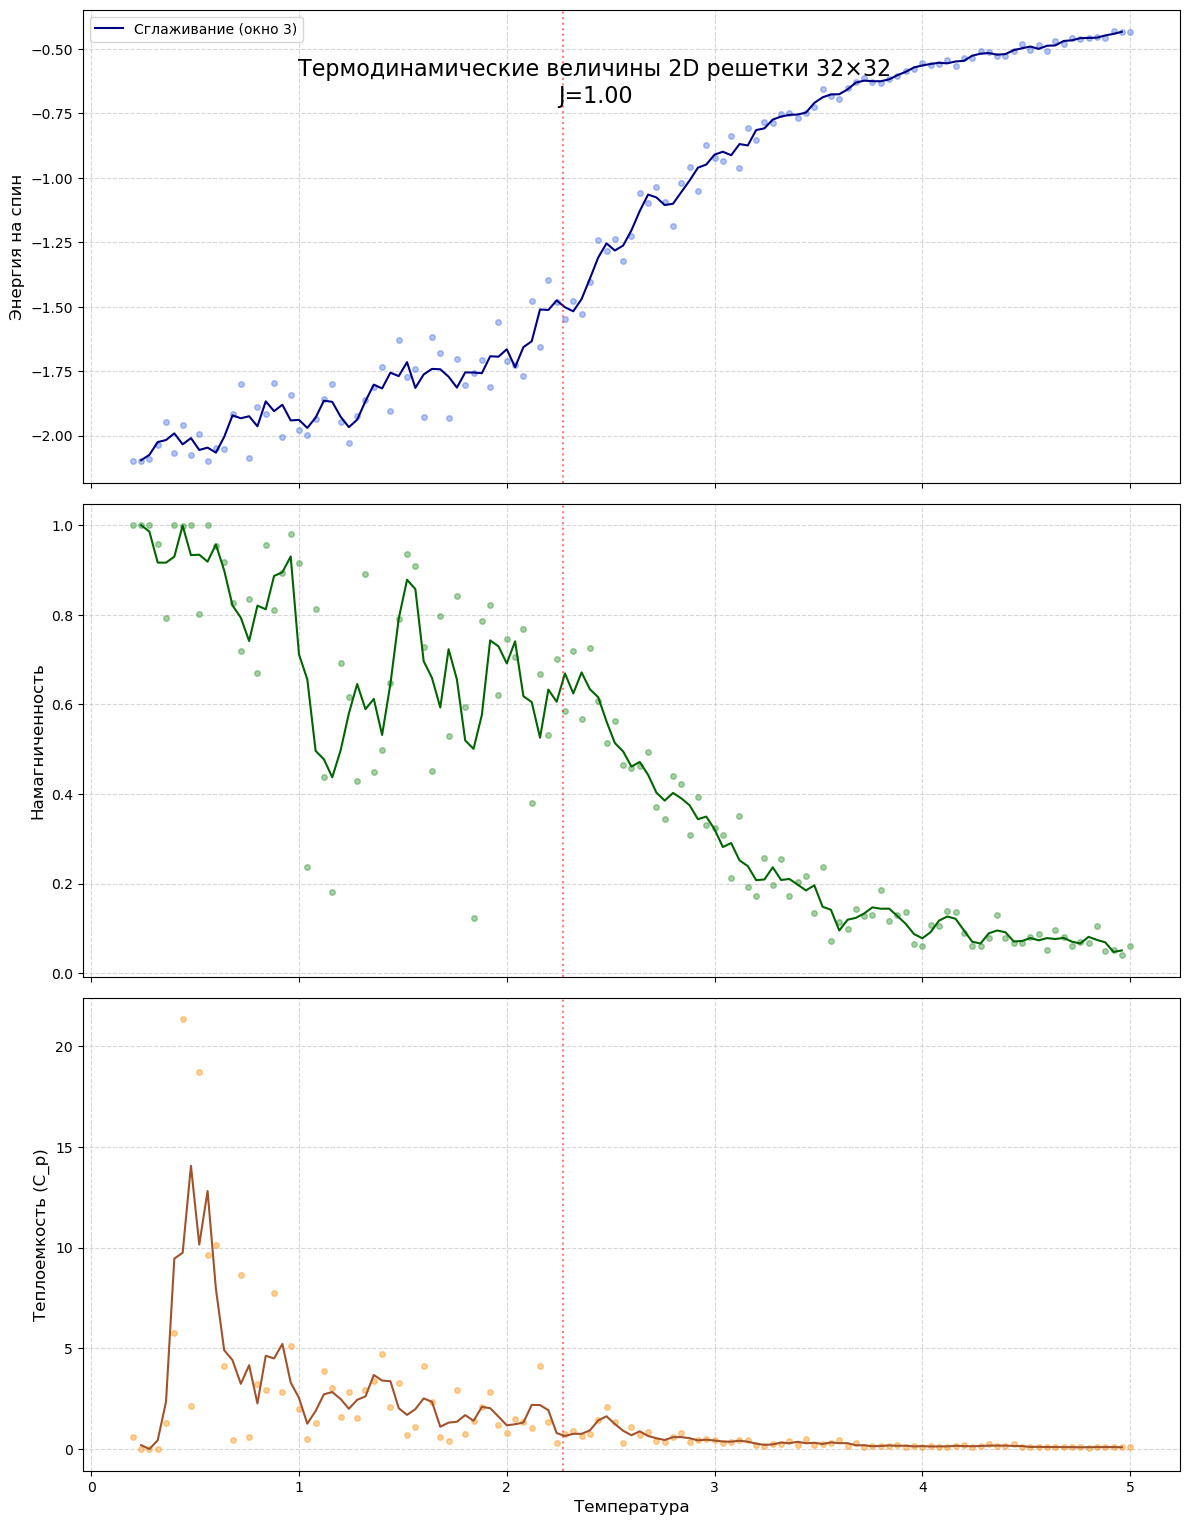

In [ ]:
# plot_all_thermodynamic_2d(temp_list, energies, magnetizations, heat_caps,
                         lattice_size, spin_j, window_size=3)